In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
from tqdm import tqdm

from src import read_dicom, Detector, Siddon
from src.metrics import xcorr2

device = torch.device("cuda:0")

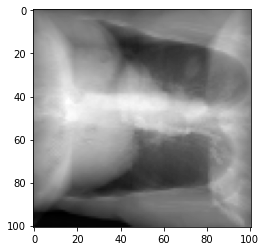

In [25]:
# DRR utility functions
volume, spacing = read_dicom("../data/cxr/")
isocenter = [0., 0., 0.]
siddon = Siddon(spacing, isocenter, volume, device)

def make_drr(source, center, height=101, delx=10.):
    """Detector parameters -> DRR"""
    detector = Detector(
        source=source,
        center=center,
        height=height,
        width=height,
        delx=delx,
        dely=delx,
        device=device
    )
    source = detector.source
    rays = detector.make_xrays()
    drr = siddon.raytrace(source, rays)
    return drr, detector.source

def plot(drr):
    plt.imshow(drr.detach().cpu(), cmap="gray")
    plt.show()    

# Get the ground truth DRR
drr, source = make_drr([-100., 160., 160.], [500., 180., 161.])
plot(drr)

In [26]:
est, _ = make_drr([-100., 160., 160.], [500., 180.001, 161.])

In [27]:
torch.norm(drr - est).backward()

In [28]:
source.grad

tensor([  -6235.2632, -404748.7188,  -10426.0674], device='cuda:0')

In [29]:
torch.norm(drr - est) / (180 - 180.001)

tensor(-394711.7812, device='cuda:0', grad_fn=<DivBackward0>)

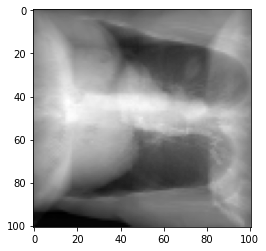

In [8]:
plot(est)